In [16]:
import numpy as np
import matplotlib.pyplot as plt
import drawing_ops as ops
from solver import solve_poisson
from utils import *

## (1) Plate capacitor

The code in the cell at index 3 initializes a 2D array `U` with dimensions `Nr x Nc` filled with zeros and then modifies it to represent a plate capacitor configuration using the `ops.plate_capacitor` function. Here's a breakdown:

1. **Initialization of Dimensions**:
    ```python
    Nr, Nc = 160, 256
    ```
    This sets the number of rows (`Nr`) to 160 and the number of columns (`Nc`) to 256.

2. **Create a Zero Matrix**:
    ```python
    U = np.zeros((Nr, Nc))
    ```
    This creates a 2D array `U` of size `160 x 256` filled with zeros.

3. **Modify the Matrix to Represent a Plate Capacitor**:
    ```python
    U = ops.plate_capacitor(input=U, center=(Nc/2, Nr/2), length=Nc/2, distance=Nc/8)
    ```
    The `ops.plate_capacitor` function is applied to the zero matrix `U`. It modifies the matrix to represent a plate capacitor with the following parameters:
    - `center=(Nc/2, Nr/2)`: The center of the capacitor is at the middle of the matrix.
    - `length=Nc/2`: The length of the capacitor plates is half the number of columns.
    - `distance=Nc/8`: The distance between the two plates is one-eighth of the number of columns.

This code sets up the initial conditions for simulating the electric potential or field in a plate capacitor configuration.

In [17]:
Nr, Nc = 160, 256
U = np.zeros((Nr, Nc))
U = ops.plate_capacitor(input=U, center=(Nc/2, Nr/2), length=Nc/2, distance=Nc/8)


## Visualization of Plate Capacitor Potential

The following cells visualize the potential distribution (`U`) of a plate capacitor. The potential is represented as a 2D heatmap using `matplotlib`. The visualization helps in understanding the initial configuration of the capacitor plates and the resulting potential field.

- **Cell 6**: Displays the potential `U` as a heatmap.
- **Cell 7**: Solves the Poisson equation for the given configuration and visualizes both the potential `U` and the resulting potential field `φ`.


Text(0, 0.5, 'y')

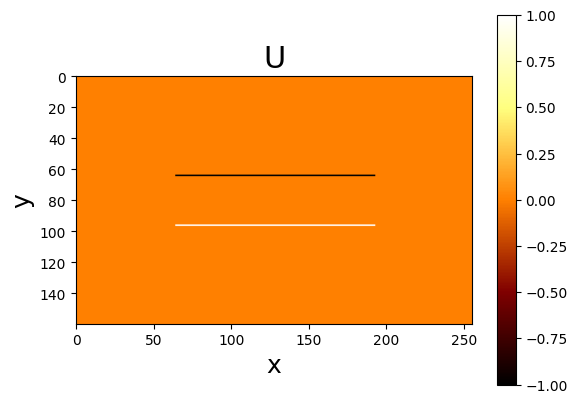

In [18]:
plt.imshow(U, cmap='afmhot')
plt.colorbar()
plt.title("U", fontdict={'fontsize': 22})
plt.xlabel('x', fontdict={'fontsize': 18})
plt.ylabel('y', fontdict={'fontsize': 18})


## Visualization of Potential Field

The variables `Nr` and `Nc` define the dimensions of the 2D grid, with `Nr` representing the number of rows (128) and `Nc` representing the number of columns (256). The variable `U` is a 2D array initialized to represent the charge distribution, while `phi` is a 2D array representing the potential field solved using the Poisson equation.

The visualization of these variables provides insights into the configuration of the system and the resulting potential field. The heatmap of `U` shows the initial charge distribution, and the heatmap of `phi` illustrates the computed potential field. These visualizations are crucial for understanding the behavior of the system under the given conditions.


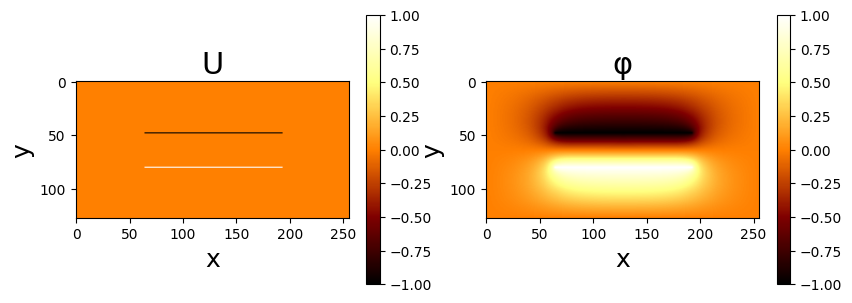

In [19]:
Nr, Nc = 128, 256
U = np.zeros((Nr, Nc))
U = ops.plate_capacitor(input=U, center=(Nc/2, Nr/2), length=Nc/2, distance=Nc/8)
phi = solve_poisson(U)

plt.figure(figsize=(15, 10))
plot_images([U, phi], ['U', 'φ'], cmap='afmhot')

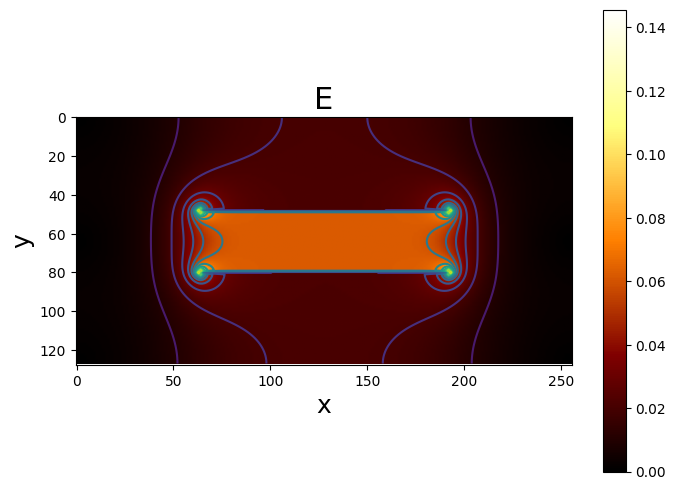

In [20]:
plot_E_intensity(phi=phi)

## (2) Dielectric block between two plates

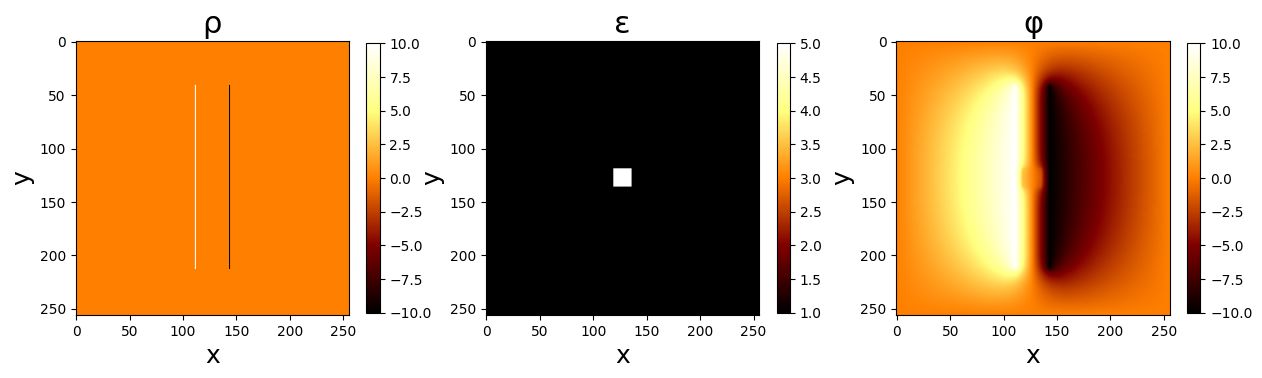

In [21]:
N = 256
capacitor = ops.plate_capacitor(center=(N/2-1, N/2-1), length=N/1.5, distance=N/8, rotation=90, values=[-10, 10])
U = capacitor(np.zeros((N, N)))

Eps = np.ones((N, N))
Eps = ops.rectangle(Eps, center=(N/2-1, N/2-1), wh=(N//16, N//16), filled=True, value=5)

phi = solve_poisson(U=U, Eps=Eps)
plot_rho_eps_phi(rho=U, eps=Eps, phi=phi)


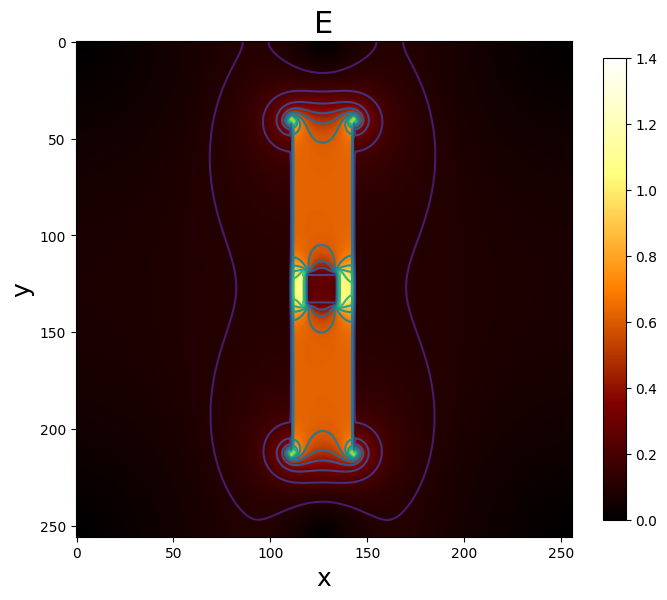

In [22]:
plot_E_intensity(phi=phi)

## (3) Two oppositely charged circles
The code in the cell at index 3 initializes a 2D array `U` with dimensions `Nr x Nc` filled with zeros and then modifies it to represent a configuration of two oppositely charged circles using the `ops.circles` function. Here's a breakdown:
1. **Initialization of Dimensions**:
    ```python
    Nr, Nc = 160, 256
    ```
    This sets the number of rows (`Nr`) to 160 and the number of columns (`Nc`) to 256.
2. **Create a Zero Matrix**:
    ```python
    U = np.zeros((Nr, Nc))
    ```
    This creates a 2D array `U` of size `160 x 256` filled with zeros.
3. **Modify the Matrix to Represent Two Oppositely Charged Circles**:
    ```python
    U = ops.circles(input=U, center1=(Nc/2, Nr/2), radius1=Nc/8, charge1=1, center2=(Nc/2, Nr/2), radius2=Nc/8, charge2=-1)
    ```
    The `ops.circles` function is applied to the zero matrix `U`. It modifies the matrix to represent two oppositely charged circles with the following parameters:
    - `center1=(Nc/2, Nr/2)`: The center of the first circle is at the middle of the matrix.
    - `radius1=Nc/8`: The radius of the first circle is one-eighth of the number of columns.
    - `charge1=1`: The first circle has a positive charge.
    - `center2=(Nc/2, Nr/2)`: The center of the second circle is also at the middle of the matrix.
    - `radius2=Nc/8`: The radius of the second circle is one-eighth of the number of columns.
    - `charge2=-1`: The second circle has a negative charge.
    - `distance=Nc/8`: The distance between the two circles is one-eighth of the number of columns.
This code sets up the initial conditions for simulating the electric potential or field in a configuration with two oppositely charged circles.
## Visualization of Two Oppositely Charged Circles
The following cells visualize the potential distribution (`U`) of the two oppositely charged circles. The potential is represented as a 2D heatmap using `matplotlib`. The visualization helps in understanding the initial configuration of the charged circles and the resulting potential field.

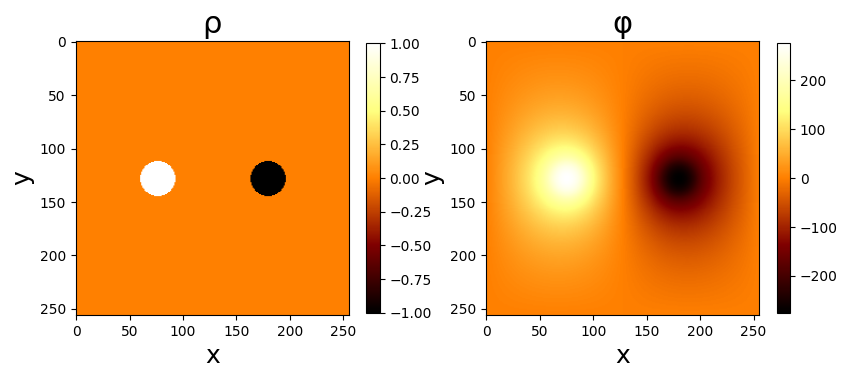

In [23]:
charges = ops.composition(
    ops.circle(center=(N/2-N/5, N/2), radius=N/16, filled=True, value=1),
    ops.circle(center=(N/2+N/5, N/2), radius=N/16, filled=True, value=-1)
)
Rho = charges(np.zeros((N, N)))

phi = solve_poisson(U=np.zeros((N, N)), Rho=Rho)
plt.figure(figsize=(15, 10))
plot_images([Rho, phi], labels=['ρ', 'φ'], cmap='afmhot')

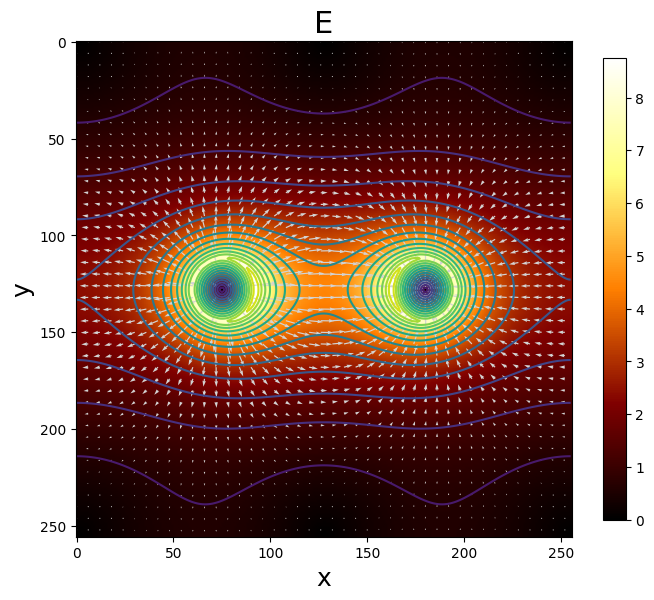

In [24]:
plot_E_intensity(phi=phi, field_vector=True)

## (4) Charged circle in front of a plate

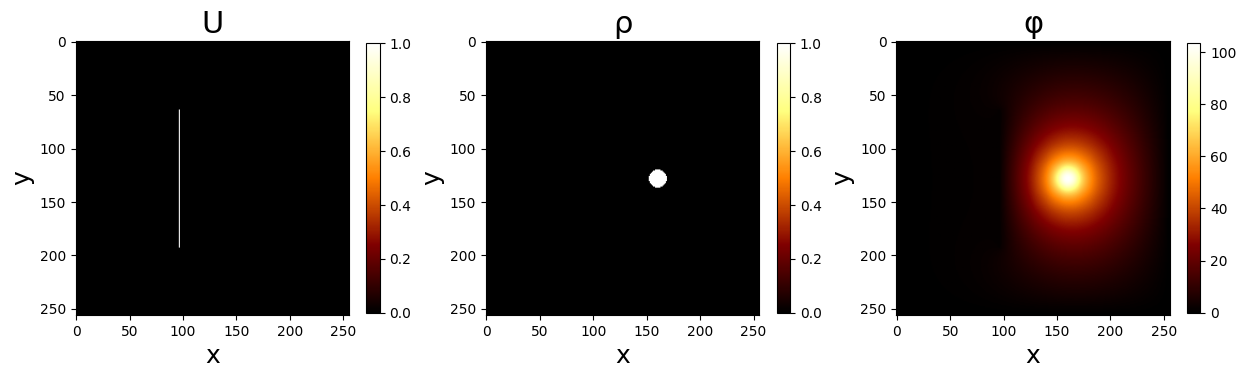

In [25]:
Rho = ops.circle(np.zeros((N, N)), center=(N/2+N/8, N/2), radius=N/32, filled=True)
U = ops.line(np.zeros((N, N)), center=(N/2-N/8, N/2), length=N/2, rotation=90, value=1)

phi = solve_poisson(U=U, Rho=Rho)
Ex, Ey = electric_field_from_potential(phi=phi)
E = amplitude(Ex, Ey)
plt.figure(figsize=(15, 10))
plot_images([U, Rho, phi], labels=['U', 'ρ', 'φ'], cmap='afmhot')

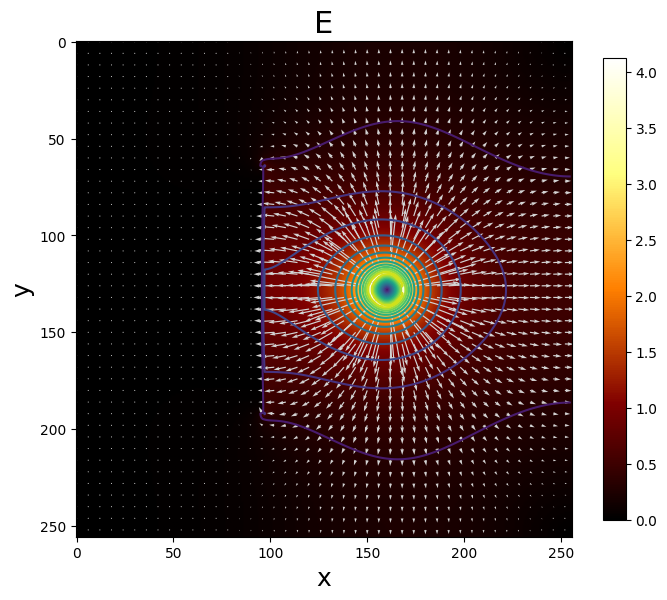

In [26]:
plot_E_intensity(phi=phi, field_vector=True)

## (5) Charged circle in front of a dielectric half-space

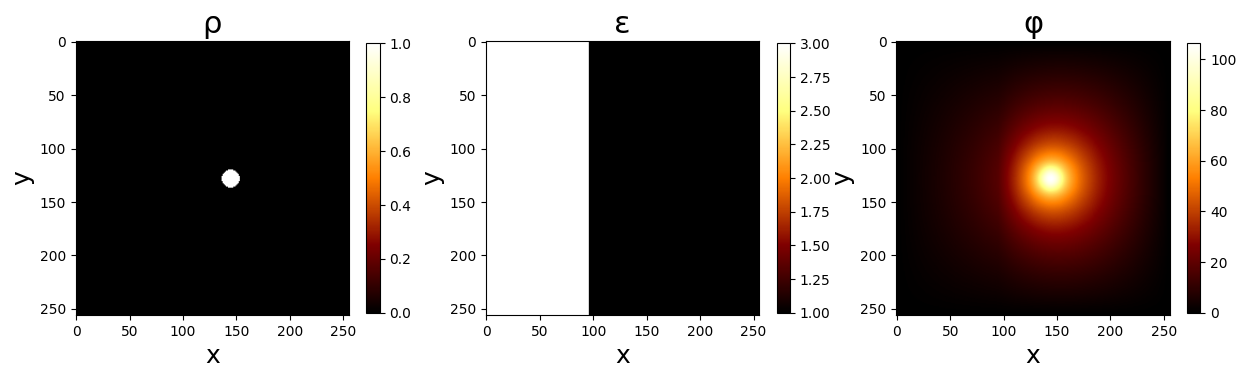

In [27]:
Eps = np.ones((N, N))
Eps[:, :N//2-N//8] = 3
Rho = ops.circle(np.zeros((N, N)), center=(N/2+N/16, N/2), radius=N/32, filled=True)
U = np.zeros((N, N))
phi = solve_poisson(U=U, Eps=Eps, Rho=Rho)
plot_rho_eps_phi(rho=Rho, eps=Eps, phi=phi)

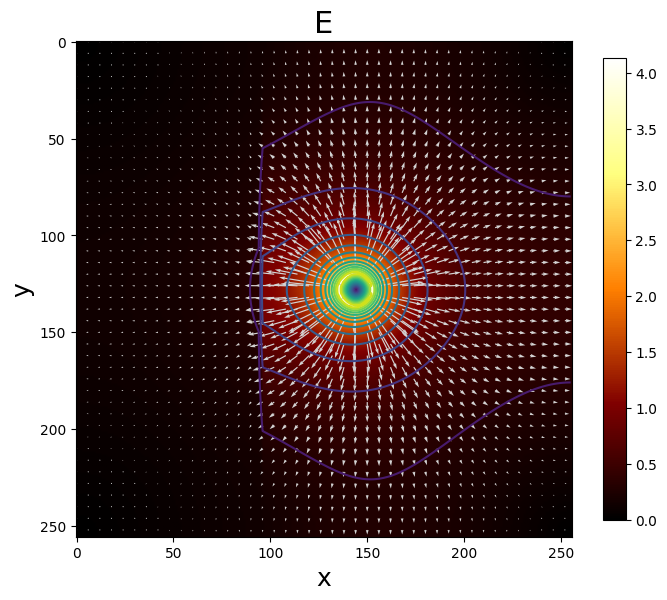

In [28]:
plot_E_intensity(phi=phi, field_vector=True)

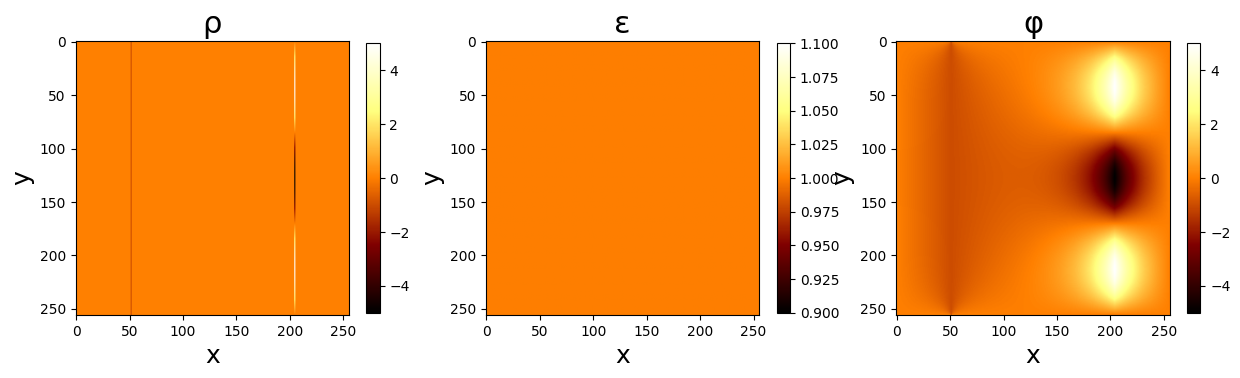

In [29]:
# Create a zero matrix for the potential
U = np.zeros((N, N))

# Define the positions of the two parallel lines
line1_center = 1 * N // 5  # First line at 1/5th of the grid
line2_center = 4 * N // 5  # Second line at 4/5th of the grid

# Set constant potential for the first line
U[:, line1_center] = -1  # Constant potential of -1

# Set sinusoidal potential for the second line
x = np.linspace(0, 1.5 * np.pi, N)
U[:, line2_center] =  5*np.sin(2*x)  # Sinusoidal potential with amplitude 5

# Solve the Poisson equation for the given configuration
phi = solve_poisson(U=U)

# Visualize the potential and the resulting field
plot_rho_eps_phi(U, eps=np.ones((N, N)), phi=phi)
# plot_E_intensity(phi=phi, field_vector=True)

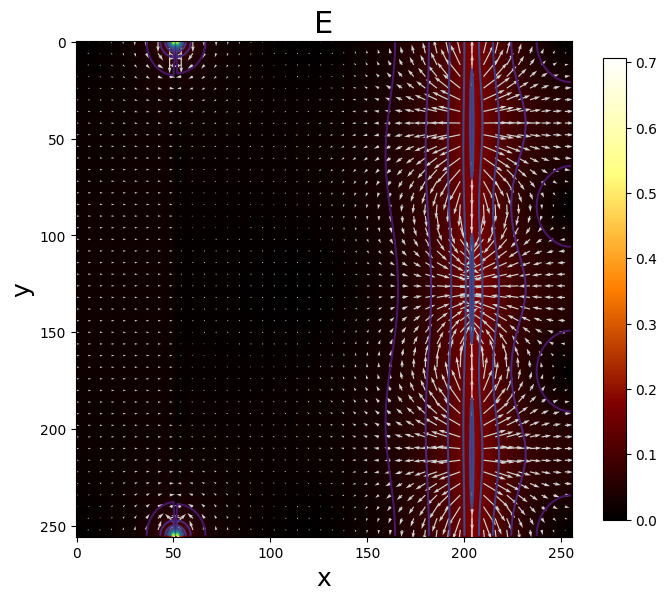

In [30]:
plot_E_intensity(phi=phi, field_vector=True, levels=20)